In [1]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/Schilderijen-Classificeren" "/content/drive"

Mounted at /gdrive


In [2]:
import shutil
shutil.unpack_archive('drive/Picasso_Rubens_400_100_100.zip','.','zip')

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
widthList = [80, 100, 150, 200, 300]
accuracy = []
avgFactor = 1.0871843363276823

for i in range(len(widthList)):
  width = widthList[i]
  height = round(width*avgFactor)
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 6s 163ms/step - loss: 0.9266 - accuracy: 0.4787 - val_loss: 0.6519 - val_accuracy: 0.6550
Epoch 2/30
25/25 [==============================] - 5s 153ms/step - loss: 0.7517 - accuracy: 0.6363 - val_loss: 1.0377 - val_accuracy: 0.4900
Epoch 3/30
25/25 [==============================] - 5s 159ms/step - loss: 0.6223 - accuracy: 0.7013 - val_loss: 0.3957 - val_accuracy: 0.8550
Epoch 4/30
25/25 [==============================] - 5s 156ms/step - loss: 0.6621 - accuracy: 0.7175 - val_loss: 0.5075 - val_accuracy: 0.8400
Epoch 5/30
25/25 [==============================] - 5s 155ms/step - loss: 0.5337 - accuracy: 0.7600 - val_loss: 0.4222 - val_accuracy: 0.8350
Epoch 6/30
25/25 [==============================] - 5s 152ms/step - loss: 0.5451 - accuracy: 0.7538 - val_loss: 0.4945 - val_accuracy: 0.7500
Epoch 7/30
25/25 [==========

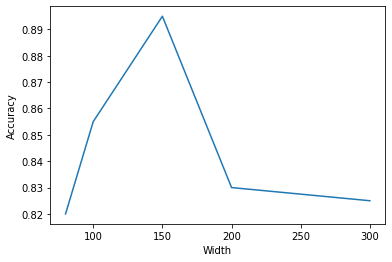

In [12]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

In [13]:
widthList = [120, 140, 160, 180]
accuracy = []
avgFactor = 1.0871843363276823

for i in range(len(widthList)):
  width = widthList[i]
  height = round(width*avgFactor)
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 7s 170ms/step - loss: 0.7514 - accuracy: 0.5688 - val_loss: 0.6103 - val_accuracy: 0.5750
Epoch 2/30
25/25 [==============================] - 5s 159ms/step - loss: 0.6180 - accuracy: 0.6712 - val_loss: 0.5338 - val_accuracy: 0.7350
Epoch 3/30
25/25 [==============================] - 5s 159ms/step - loss: 0.5503 - accuracy: 0.7212 - val_loss: 0.4720 - val_accuracy: 0.8100
Epoch 4/30
25/25 [==============================] - 5s 158ms/step - loss: 0.5396 - accuracy: 0.7387 - val_loss: 0.4710 - val_accuracy: 0.7950
Epoch 5/30
25/25 [==============================] - 5s 160ms/step - loss: 0.5129 - accuracy: 0.7650 - val_loss: 0.4304 - val_accuracy: 0.8500
Epoch 6/30
25/25 [==============================] - 5s 160ms/step - loss: 0.4662 - accuracy: 0.7812 - val_loss: 0.3859 - val_accuracy: 0.8450
Epoch 7/30
25/25 [==========

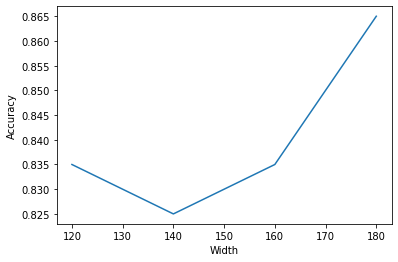

In [14]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

In [16]:
widthList = [110, 120, 130, 140, 150, 160, 170, 180]
accuracy = []
avgFactor = 1.0871843363276823

for i in range(len(widthList)):
  width = widthList[i]
  height = round(width*avgFactor)
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 7s 176ms/step - loss: 0.9304 - accuracy: 0.5375 - val_loss: 0.6616 - val_accuracy: 0.4900
Epoch 2/30
25/25 [==============================] - 5s 160ms/step - loss: 0.7229 - accuracy: 0.5938 - val_loss: 0.6201 - val_accuracy: 0.7200
Epoch 3/30
25/25 [==============================] - 5s 162ms/step - loss: 0.6153 - accuracy: 0.7063 - val_loss: 0.4139 - val_accuracy: 0.8450
Epoch 4/30
25/25 [==============================] - 5s 159ms/step - loss: 0.6559 - accuracy: 0.6975 - val_loss: 0.4771 - val_accuracy: 0.7850
Epoch 5/30
25/25 [==============================] - 5s 170ms/step - loss: 0.4754 - accuracy: 0.7600 - val_loss: 0.4292 - val_accuracy: 0.8350
Epoch 6/30
25/25 [==============================] - 5s 164ms/step - loss: 0.5208 - accuracy: 0.7613 - val_loss: 0.3922 - val_accuracy: 0.8050
Epoch 7/30
25/25 [==========

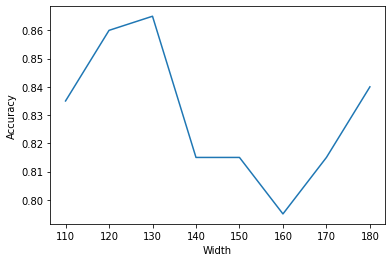

In [17]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

In [18]:
widthList = [110, 120, 130, 140, 150, 160, 170, 180]
accuracy = []
avgFactor = 1.0871843363276823

for i in range(len(widthList)):
  width = widthList[i]
  height = round(width*avgFactor)
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 7s 175ms/step - loss: 0.7173 - accuracy: 0.4988 - val_loss: 0.6783 - val_accuracy: 0.7500
Epoch 2/30
25/25 [==============================] - 5s 167ms/step - loss: 0.6318 - accuracy: 0.6650 - val_loss: 0.4853 - val_accuracy: 0.7700
Epoch 3/30
25/25 [==============================] - 5s 164ms/step - loss: 0.5728 - accuracy: 0.7237 - val_loss: 0.4260 - val_accuracy: 0.8050
Epoch 4/30
25/25 [==============================] - 5s 163ms/step - loss: 0.5078 - accuracy: 0.7812 - val_loss: 0.3808 - val_accuracy: 0.8400
Epoch 5/30
25/25 [==============================] - 5s 161ms/step - loss: 0.4907 - accuracy: 0.7663 - val_loss: 1.1122 - val_accuracy: 0.6300
Epoch 6/30
25/25 [==============================] - 5s 162ms/step - loss: 0.4400 - accuracy: 0.7937 - val_loss: 0.5985 - val_accuracy: 0.7550
Epoch 7/30
25/25 [==========